# Exercise 1

## Import libraries

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1.

## Task 2.

Let's use the SIR model, which is a widely used model to describe the spread of an epidemic. In the model $S(t)$ stands for the count of susceptibles, $I(t)$ the count of infected individuals and $R(t)$ the count of recovered individuals at a day $t$.

We are especially interested in the pace of spread for the epidemic, so we can look at the rate of change in the random variables of the model.

The count of susceptibles changes at a rate
$$
\frac{dS}{dt} = -\beta IS
$$

where $\beta$ stands for the average contacts per day for an individual multiplied by the probability for a susceptible to contract the disease from an infected individual. This we can define as the average amount of people $x$ in the range of $1$ meter in the population multiplied by the probability $0.20$ if there are more than $5$ people in range, else $0$. We get 

$$\beta = \begin{cases} 0.20x, \textbf{   if   } x>6\\ 0, \textbf{   if   } x \leq 5 \end{cases}$$ 

The rate of change in infected individuals is defined as

$$
\frac{dI}{dt} = \beta IS - \lambda I
$$

where $\lambda$ stands for the count of days that an individual stays infected. We can define this by the probability of recovery $\lambda = 0.08$.

Lastly, we have the rate of change in recoveries, which is defined as

$$
\frac{dR}{dt} = \lambda I
$$

At first, we know that the count of infected individuals $I = 500$ and susceptibles $S = N - 500$, where $N$ is the total amount of people in the monitored area. Knowing these, we can further estimate the spread of the disease. 

## Task 3.
### b)

Initially, there is 1000 butterflies in a corner square

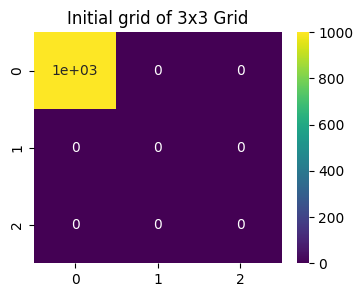

In [27]:
grid = np.zeros((3,3))
grid[0,0] = 1000

plt.figure(figsize=(4, 3))
sns.heatmap(grid, annot=True, cmap="viridis", cbar=True, vmin=0, vmax=1000)
plt.title('Initial grid of 3x3 Grid')
plt.show()

Collect the coordinates of adjacent squares for each square (let's assume that the butterflies can cross diagonally)

In [28]:
adjacent_squares = {
    (0,0): [(0,1), (1,0), (1,1)],
    (0,1): [(0,0), (0,2), (1,0), (1,1), (1,2)],
    (0,2): [(0,1), (1,1), (1,2)],
    (1,0): [(0,0), (0,1), (1,1), (2,0), (2,1)],
    (1,1): [(0,0), (0,1), (0,2), (1,0), (1,2), (2,0), (2,1), (2,2)],
    (1,2): [(0,1), (0,2), (1,1), (2,1), (2,2)],
    (2,0): [(1,0), (1,1), (2,1)],
    (2,1): [(1,0), (1,1), (1,2), (2,0), (2,2)],
    (2,2): [(1,1), (1,2), (2,1)],
}

There is 0.2 probability that the butterflies will cross the boundry to an adjancet square within an hour

In [29]:
p = 0.2

Simulate the grid over hours

In [30]:
hours = 100
grid_by_hour = {}
for hour in range(hours):
    spread = dict.fromkeys(adjacent_squares.keys(), 0)

    for square, adj_squares in adjacent_squares.items():
        n_butterflies = grid[square]
        for adj_square in adj_squares: spread[adj_square] += (n_butterflies * p) / len(adj_squares)

    grid *= (1-p)
    for square, added_butterflies in spread.items(): grid[square] += added_butterflies

    grid_by_hour[hour+1] = grid.copy()

Visualize grid evolution

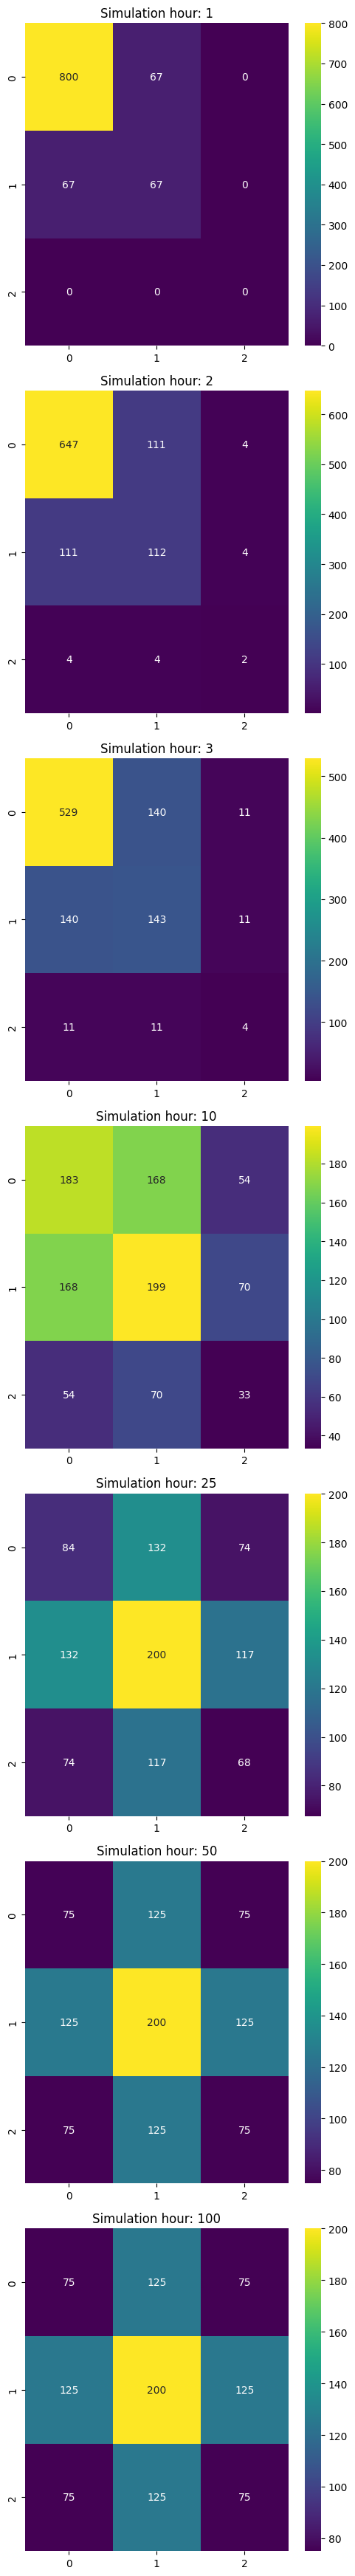

In [36]:

hours = [1,2,3, 10, 25, 50, 100]
fig, axs = plt.subplots(len(hours), 1, figsize=(5, len(hours)*5))

for idx, hour in enumerate(hours):
    sns.heatmap(grid_by_hour[hour], annot=True, cmap="viridis", cbar=True, ax=axs[idx], fmt=".0f")
    axs[idx].set_title(f"Simulation hour: {hour}")

plt.tight_layout()
plt.show()